In [25]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image # for reading images
# Keras Libraries <- CNN
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D,Flatten, Dense, Input, BatchNormalization, Concatenate, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
#from sklearn.metrics import classification_report, confusion_matrix # <- define evaluation metrics

In [26]:
mainDIR = os.listdir('./chest_xray')
print(mainDIR)
train_folder= './chest_xray/train/'
val_folder = './chest_xray/val/'
test_folder = './chest_xray/test/'
# train
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'
#Normal pic
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)
norm_pic_address = train_n+norm_pic
#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
sic_pic = os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

['test', 'val', 'train']
1341
normal picture title:  IM-0737-0001.jpeg
pneumonia picture title: person1414_bacteria_3627.jpeg


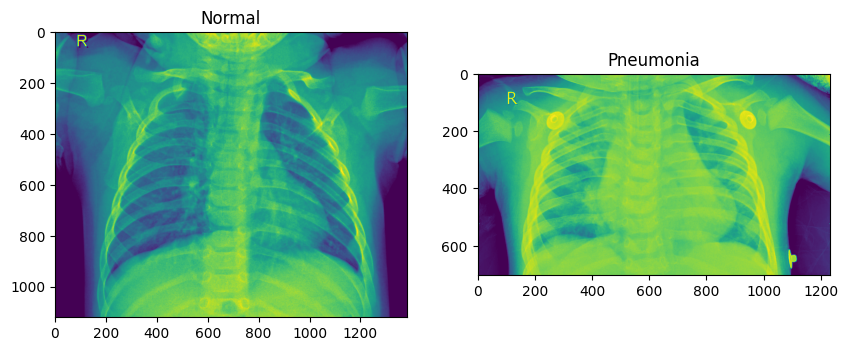

In [32]:
# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)
#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')
a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')
plt.show()
# let's build the CNN model

In [58]:
num_of_test_samples = 600
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

#Image normalization.
training_set = train_datagen.flow_from_directory('./chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory("./chest_xray/val",
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='binary')

test_set = test_datagen.flow_from_directory("./chest_xray/test",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [59]:
model_fin = Sequential()
model_fin.add(tf.keras.Input(shape = (64,64,3)))
model_fin.add(Flatten())       
model_fin.add(Dense(128, activation='relu'))
model_fin.add(Dense(64, activation='relu'))
model_fin.add(Dense(32, activation='relu'))
model_fin.add(Dense(1,activation='sigmoid'))
model_fin.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,583,361 (6.04 MB)

 Trainable params: 1,583,361 (6.04 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model_fin.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

history = model_fin.fit(training_set,epochs=5,batch_size=5,validation_data = validation_set)
model_fin.save('medical_model_fin.h5')


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 136ms/step - accuracy: 0.8589 - loss: 0.3565 - val_accuracy: 0.6250 - val_loss: 0.5840
Epoch 2/5


/home/kjh/perceptron/.percep_venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - accuracy: 0.8838 - loss: 0.2757 - val_accuracy: 0.8125 - val_loss: 0.4724
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - accuracy: 0.8783 - loss: 0.2646 - val_accuracy: 0.8750 - val_loss: 0.3977
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 135ms/step - accuracy: 0.8884 - loss: 0.2644 - val_accuracy: 0.7500 - val_loss: 0.4799
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 140ms/step - accuracy: 0.8996 - loss: 0.2441 - val_accuracy: 0.8125 - val_loss: 0.4988


In [75]:
test_accu = model_fin.evaluate(test_set,steps=624)
print('The testing accuracy is :',test_accu[1]*100, '%')
Y_pred = model_fin.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)

624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8142 - loss: 0.4144    
The testing accuracy is : 81.41025900840759 %


2024-05-29 16:47:27.821505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step 


In [78]:
import pandas as pd

df_result = pd.DataFrame(columns=['Actual', 'Predicted'])
df_result['Actual'] = test_set.classes
df_result['Predicted'] = y_pred
df_result.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


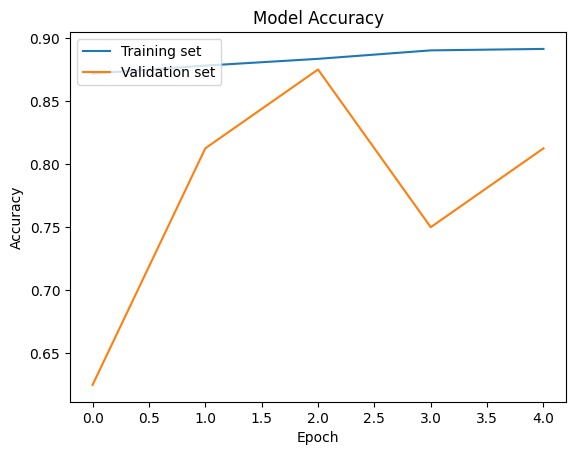

<Figure size 640x480 with 0 Axes>

In [67]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.savefig('train_accuracy.png')
plt.show(block=False)
plt.clf()

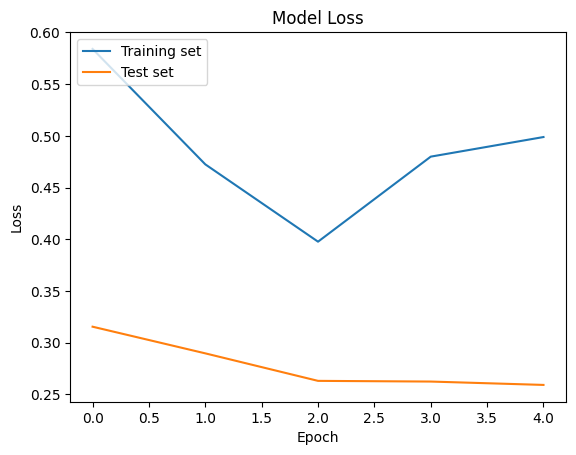

<Figure size 640x480 with 0 Axes>

In [68]:
# Loss
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'],loc='upper left')
plt.savefig('train_loss.png')
plt.show(block=False)
plt.clf()